## Empirical modeling

Our goal is to learn from data through construction of statistical models.  Explicit in this is statistics which demands understanding and adherence to rules of probability.  In this section, we will lay out the basic foundations of probability and give examples to assist in our understanding.  Our general flow will be to understand the rules of probability and how to manipulate them, move to probability distributions and descriptive statistics, touch on likelihood and Bayes, and end with a discussion on inference.   

<br>
<br>
<hr style="border:2px solid blue"> </hr>

## Principals of Probability

In this section, we will lay out the principles guiding our models -- probability and statistics.  

Outline of discussion:
    
* Stochastic processes -- chance regularities
* Belief and probability
* Rules of probability
* Factoring joint probabilities

General references:
  
+ Statistical Inference (9780534243128): Casella, George, Berger, Roger L.  
+ Probability Theory and Statistical Inference: Empirical Modeling with Observational Data (9781107185142): Spanos, A.  
+ Bayesian Models: A Statistical Primer for Ecologists (9780691159287): Hobbs, N. Thompson, Hooten, Mevin B.  
+ A First Course in Bayesian Statistical Methods (0387922997): Hoff, Peter D.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

## Chance regularities

The processes we are interested in are non-deterministic (exhibits chance) where patterns reveal themselves (show regularities) after collection lots of data.  Arguably, modern statistics started with quantifying betting odds in dice games such as the sum of spots (for example, see [Feldman and Morgan](http://jse.amstat.org/v11n2/feldman.html) for a discussion of HOG).  To illustrate this, consider a game of dice where we throw 2 dice and sum the dots.  Let's simulate this in python and look at the data.

In [0]:
## simulate 500 rolls of 2 dice using random sampling with replacement
import random
import pandas as pd
random.seed(13457)
total_rolls = 1000 
numbers = range(0,total_rolls-1)
evens = list(filter(lambda x: x % 2, numbers))
odds = [x+1 for x in evens]

dice = [1, 2, 3, 4, 5, 6]
rolls = random.choices(dice,k=total_rolls)
rolls1 = [rolls[i] for i in evens]
rolls2 = [rolls[i] for i in odds]

df = pd.DataFrame({'die1' : rolls1,
                   'die2' : rolls2})
df.loc[:,'dots'] = df.sum(axis=1)

## look at the first 10 dice throws
df.head(n=10)

,die1,die2,dots
0,6,2,8
1,6,4,10
2,1,6,7
3,5,3,8
4,3,5,8
5,5,2,7
6,1,6,7
7,6,5,11
8,2,4,6
9,6,6,12


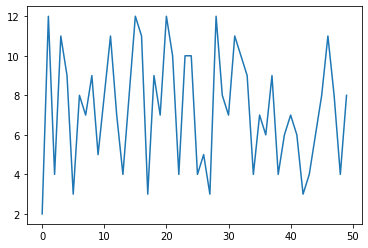

In [0]:
# view the first 50 throws
tplot = df['dots'].head(n=50).plot()

In [0]:
# summarize the dot counts
df['dots'].value_counts()

7 92
6 79
8 73
9 47
5 46
10 40
4 35
3 32
11 27
12 15
2 14
Name: dots, dtype: int64

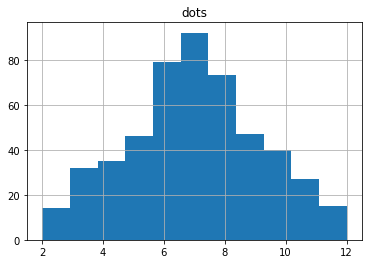

In [0]:
# plot the frequencies as counts
h = df.hist(column='dots', bins=11)

In this simulated game, we notice:

    * we are not able to predice with certainty the next throw  
    * some combinations occur with higher frequency  
    * the shape of the tabulated data is roughly triangular

## Belief and probability

So, from this and maybe experience, we see that 7's occur more frequently than 12's, 5's and 9's about the same, etc, so we have a beleif.  How do we go from a 'hunch' to a quantified understanding of the game?  The answer is statistics and probability.


<br>
<br>
<hr style="border:2px solid blue"> </hr>

## Sample space, outcomes and events

To get an understanding of probability, we need some definitions.

1. outcomes -- mutually exclusive and exhaustive list of possible results in a model  
2. events -- sets containing zero or more outcomes, we define events we are interested in  
3. sample space -- set of all possible outcomes (must be collectively exhaustive and mutually exclusive). 

Consider the dice game.

Outcomes: 2,3,4,5,6,7,8,9,10,11,12  
Events: up to us, what game we play, could be evens vs odds for instance  
Sample space: 2,3,4,5,6,7,8,9,10,11,12  

Throwing 3 coins, counting the heads, evens wins 

Outcomes: 0,1,2,3  
Events: {0,2}, {1,3}  
Sample space: 0,1,2,3  

To conform with the set theory behind this, the event space (\\(\mathcal{F}\\)) must conform to a series of conditions:

1. the event space contains the sample space \\(S \in \mathcal{F}\\)   
2. the event space is closed under compliments, ie if \\(E \in \mathcal{F}, E^c \in \mathcal{F}\\)  
3. the event space is closed under countable unions, \\(E_i \in \mathcal{F}\\) for i=1,2,..., then \\((\bigcup_{i=1}^{\infty}E_i) \in \mathcal{F}\\)

For completeness, we would need to include the empty set and the sample space to both event lists if we had wanted to enumerate the events in the event space.



<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Probability Space and Probability

Armed with some definitions of outcomes and events, we are finally ready to talk about probability.

A probability space is a combination of a sample space, event space, and probability function.  The probability function is a real-valued function mapping events to the interval [0,1].  The probability function adheres to the Axioms of Probability (Kolmogorov Axioms).  These are summarized as:
    
1. the probability of an event is a real number on the interval [0,1]  
    
    $$0 \le P(E) \le 1$$  
    <br>
2. the probability of at least one event occurring is 1  
    
    $$P(S) = 1$$ where S is the sample space  
    <br>
3. countable mutually exclusive sets of events satisfy the following  
    
    $$P(\bigcup_{i=1}^\infty E_i) = \sum_{i=1}^\infty P(E_i)$$  
<br>
<br>
<br>
<hr style="border:2px solid blue"> </hr>

### GRADED EVALUATION (15 mins)

1. You repeatedly roll a die (some large number of times, say 1M) and come up with the following probability of roll results for spots 1-6 in order: {0.14,0.10,0.20,0.14,0.14,0.28). The probability of rolling a 3 is greater than that of rolling a 4.

   a. True 

   b. False  
  
  
2. The die in the previous question is fair. 

   a. True 

   b. False   
  
  
3. You toss a both a fair coin and a fair die simultaneously. The sample space is 

   a. {(HT),(1,2,3,4,5,6)} 

   b. {(H,1),(H,2),(H,3),(H,4),(H,5),(H,6),(T,1),(T,2),(T,3),(T,4),(T,5),(T,6)}   
  
  
4. In this game of tossing a coin and die, the die comes up 6.  What is the probability of the coin landing heads?

   a. 0.5 

   b. 0.8  

6.  You do the above game twice, in the first trial, it came up (H,6).  What is the probability that event will occur in the second go (0.00%)?

   a. 0.69

   b. 0.08 
   
<br>
<br>
<hr style="border:2px solid blue"> </hr>